In [129]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, math, time 
from scipy.special import factorial

# Question 1

The question states: modift the KN routine crow() to calculate (...). No idea what that means.

# Question 2

This function is supposed to support numbers in a list which begin with 0, but this is impossible in python. Perhaps the list should include numbers as strings rather than integers or floats.

In [130]:
def benfordize(arr = np.array([123,234,543.4,'234',534,'057',678,4235])):
    first_elements = [] #empty list
    pct_frequencies = [] #empty list
    for i, e in enumerate(arr): # loop through all elements in array
        e_str = str(e) # convert to string
        first_element = int(e_str[0]) # get first digit
        first_elements.append(first_element) # append to list
    frequencies = np.array([], dtype = int) # create empty array
    for i in range(1,10): # loop through from 1 to 9
        # find where all of the elements in first_elements are equal to i
        # take the length of that arran and then append that to the frequencies array  
        frequencies = np.append(frequencies, len(np.where(np.array(first_elements) == i)[0])) 
    for frequency in frequencies:
        pct_frequencies.append(frequency/sum(frequencies)*100)
    return frequencies, pct_frequencies

# Question 3

I decided not to include zeros.

In [131]:
def rand_gen(N = 100_000):
    numbers = np.array([])
    for i in range(N):
        rand = random.uniform(-10,10)
        y = 10**rand
        numbers =  np.append(numbers,y)
    return numbers

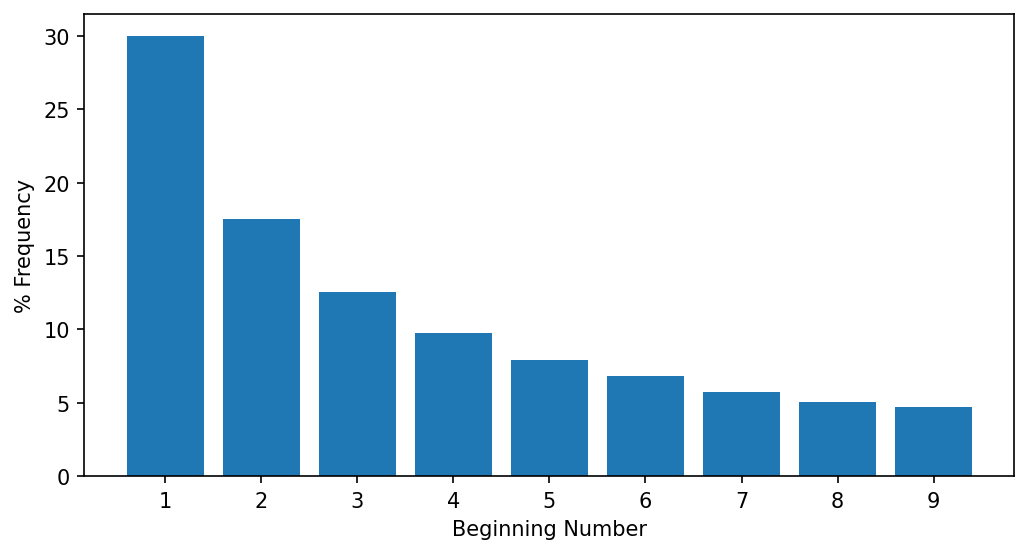

In [132]:
y_abs, y_pct = benfordize(rand_gen())
x = [str(i) for i in range(1,10)]
fig, axes = plt.subplots(1,1, figsize=(8,4), dpi=150)

axes.bar(x,y_pct)
axes.set_xlabel("Beginning Number")
axes.set_ylabel(r"% Frequency")
plt.show()

According to Benford's law, 1 should appear about 30 % of the time and 9 should appear less than 9% of the time. Our data agrees with Benford's Law.

# Question 4

In [133]:
my_exp = lambda x, N:  sum([x**n/factorial(n) for n in range(N)])

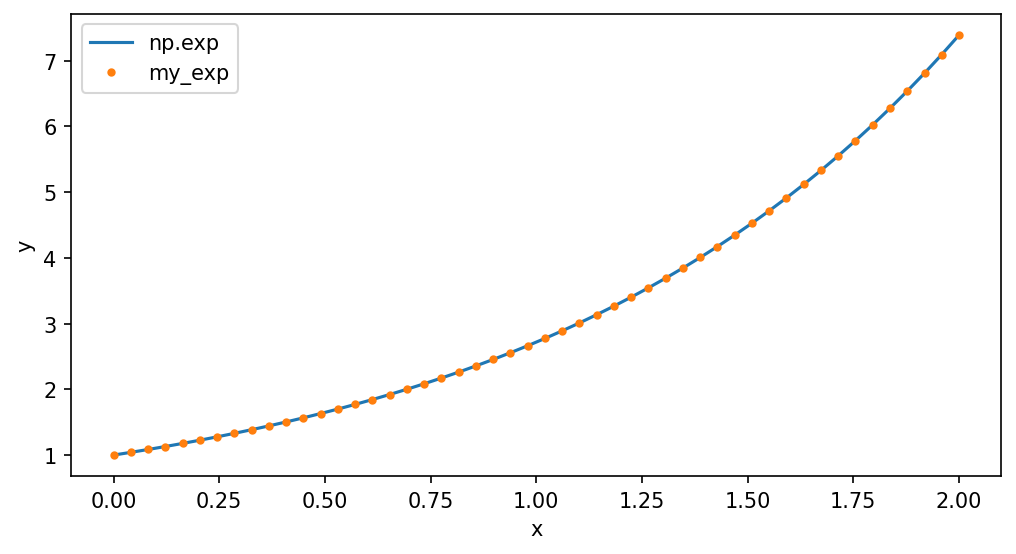

In [134]:
x, N = np.linspace(0,2,50), 100
fig, axes = plt.subplots(1,1, figsize=(8,4), dpi=150)
axes.plot(x, np.exp(x), '-', label="np.exp")
axes.plot(x, my_exp(x, N), '.', label="my_exp")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend()
plt.show()

# Question 5